<a href="https://colab.research.google.com/github/Vinsane06/website/blob/main/Manhattan%20housing%20sales%20Predictive%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [476]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [477]:
dataset = pd.read_csv('Manhattan12.csv')
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

In [478]:
print(dataset.shape)

(27399, 21)


In [494]:
dataset = dataset.rename(columns={'SALE\nPRICE': 'SALE_PRICE'})
dataset = dataset.rename(columns={'Unnamed: 2': 'NEIGHBORHOOD','Unnamed: 14': 'LAND SQUARE FEET','Unnamed: 15': 'GROSS SQUARE FEET','Unnamed: 16': 'YEAR BUILT', 'Unnamed: 19': 'SALE PRICE', 'Unnamed: 20': 'SALE DATE'})
print(dataset.columns)

Index(['Manhattan Rolling Sales File.  All Sales From August 2012 - August 2013. ',
       'Unnamed: 1', 'NEIGHBORHOOD', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'Unnamed: 17', 'Unnamed: 18',
       'SALE PRICE', 'SALE DATE', 'Logprice'],
      dtype='object')


In [480]:
categorical_variables = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 17','Unnamed: 18']
#dropped borough,ease-ment,apartment number
numerical_variables = ['GROSS SQUARE FEET', 'YEAR BUILT', 'LAND SQUARE FEET', 'SALE PRICE']
print(dataset.head())

  Manhattan Rolling Sales File.  All Sales From August 2012 - August 2013.   \
0  Sales File as of 08/30/2013  Coop Sales Files ...                          
1  Neighborhood Name 09/06/13, Descriptive Data i...                          
2  Building Class Category is based on Building C...                          
3                                            BOROUGH                          
4                                                  1                          

                  Unnamed: 1                                    Unnamed: 2  \
0                        NaN                                           NaN   
1                        NaN                                           NaN   
2                        NaN                                           NaN   
3               NEIGHBORHOOD                       BUILDING CLASS CATEGORY   
4                             13  CONDOS - ELEVATOR APARTMENTS               

             Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6

In [481]:
for col in numerical_variables:
    dataset[col] = pd.to_numeric(dataset[col].replace('[\$,]', '', regex=True), errors='coerce')
    dataset[col] = dataset[col].astype(float)
    dataset[col] = dataset[col].astype(int, errors='ignore')
print(dataset.head())

  Manhattan Rolling Sales File.  All Sales From August 2012 - August 2013.   \
0  Sales File as of 08/30/2013  Coop Sales Files ...                          
1  Neighborhood Name 09/06/13, Descriptive Data i...                          
2  Building Class Category is based on Building C...                          
3                                            BOROUGH                          
4                                                  1                          

                  Unnamed: 1                                    Unnamed: 2  \
0                        NaN                                           NaN   
1                        NaN                                           NaN   
2                        NaN                                           NaN   
3               NEIGHBORHOOD                       BUILDING CLASS CATEGORY   
4                             13  CONDOS - ELEVATOR APARTMENTS               

             Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6

In [482]:
dataset['SALE DATE'] = pd.to_datetime(dataset['SALE DATE'], errors='coerce')

<ipython-input-482-96f82d820b4f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['SALE DATE'] = pd.to_datetime(dataset['SALE DATE'], errors='coerce')


In [483]:
for col in categorical_variables:
    dataset[col] = dataset[col].str.strip().replace('', np.nan)

In [485]:
dataset[['GROSS SQUARE FEET', 'YEAR BUILT', 'LAND SQUARE FEET', 'SALE PRICE']] = dataset[['GROSS SQUARE FEET', 'YEAR BUILT', 'LAND SQUARE FEET', 'SALE PRICE']].replace(0, np.nan)

In [486]:
print(dataset.isnull().sum())

Manhattan Rolling Sales File.  All Sales From August 2012 - August 2013.         0
Unnamed: 1                                                                       3
Unnamed: 2                                                                    3457
Unnamed: 3                                                                     146
Unnamed: 4                                                                       3
Unnamed: 5                                                                       3
Unnamed: 6                                                                   27398
Unnamed: 7                                                                       3
Unnamed: 8                                                                       3
Unnamed: 9                                                                   14573
Unnamed: 10                                                                      3
Unnamed: 11                                                                      3
Unna

In [487]:
print(dataset.describe())

       LAND SQUARE FEET  GROSS SQUARE FEET    YEAR BUILT    SALE PRICE
count       4489.000000       4.326000e+03  20954.000000  1.980200e+04
mean        5893.466028       6.061620e+04   1953.080557  2.556609e+06
std         7884.729624       8.111694e+04     37.692641  1.916295e+07
min          200.000000       2.530000e+02   1000.000000  1.000000e+00
25%         2104.000000       6.198500e+03   1920.000000  3.676662e+05
50%         5046.000000       2.337150e+04   1955.000000  7.400000e+05
75%         7532.000000       1.128500e+05   1987.000000  1.627399e+06
max       213650.000000       1.970736e+06   2013.000000  1.307965e+09


In [488]:
#using iqr method, but we can also use z-score method

for col in numerical_variables:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    dataset = dataset[dataset[col] > lower_bound]
    dataset = dataset[dataset[col] < upper_bound]

In [489]:
print(dataset.shape)

(2437, 21)


In [490]:
dataset['Logprice'] = np.log1p(dataset['SALE PRICE'])

In [491]:
dataset.to_csv('cleaned_manhattan_data.csv', index=False)

In [492]:
import seaborn as sns

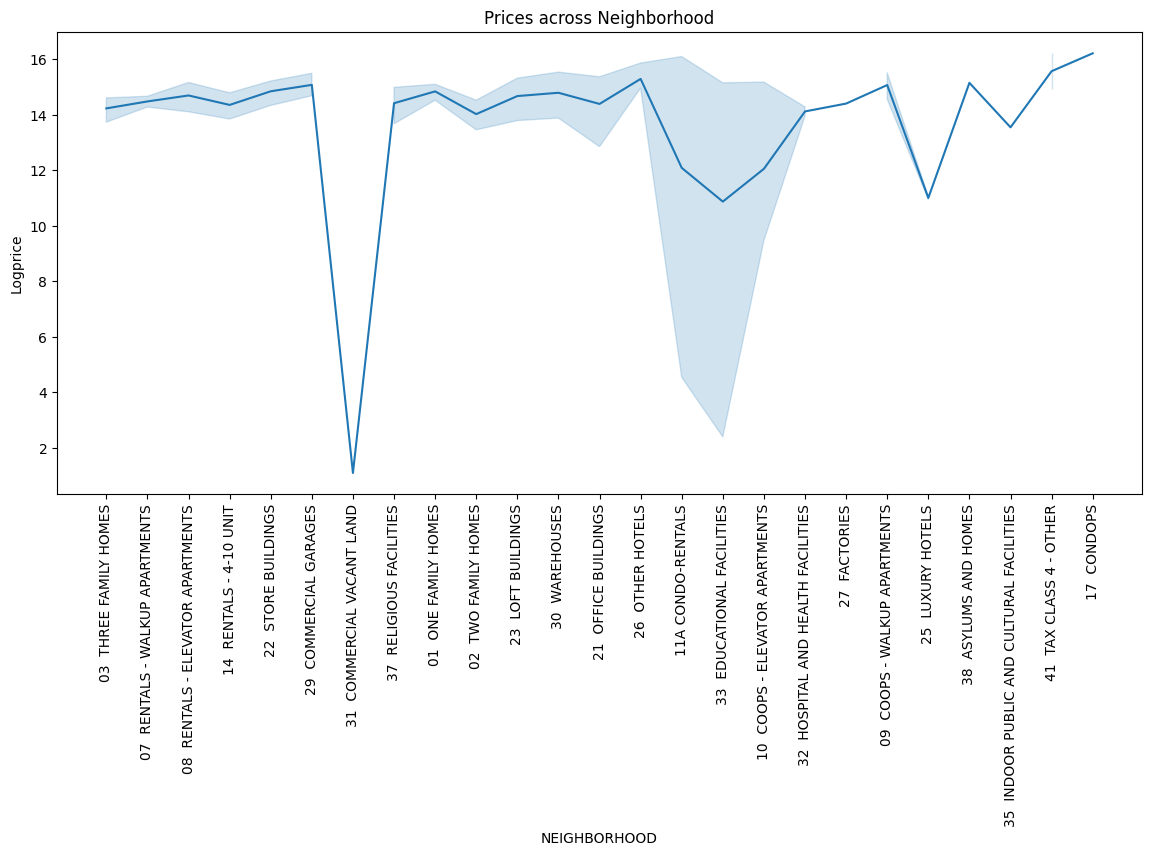

In [495]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='NEIGHBORHOOD', y='Logprice', data=dataset)
plt.xticks(rotation=90)
plt.title('Prices across Neighborhood')
plt.show()

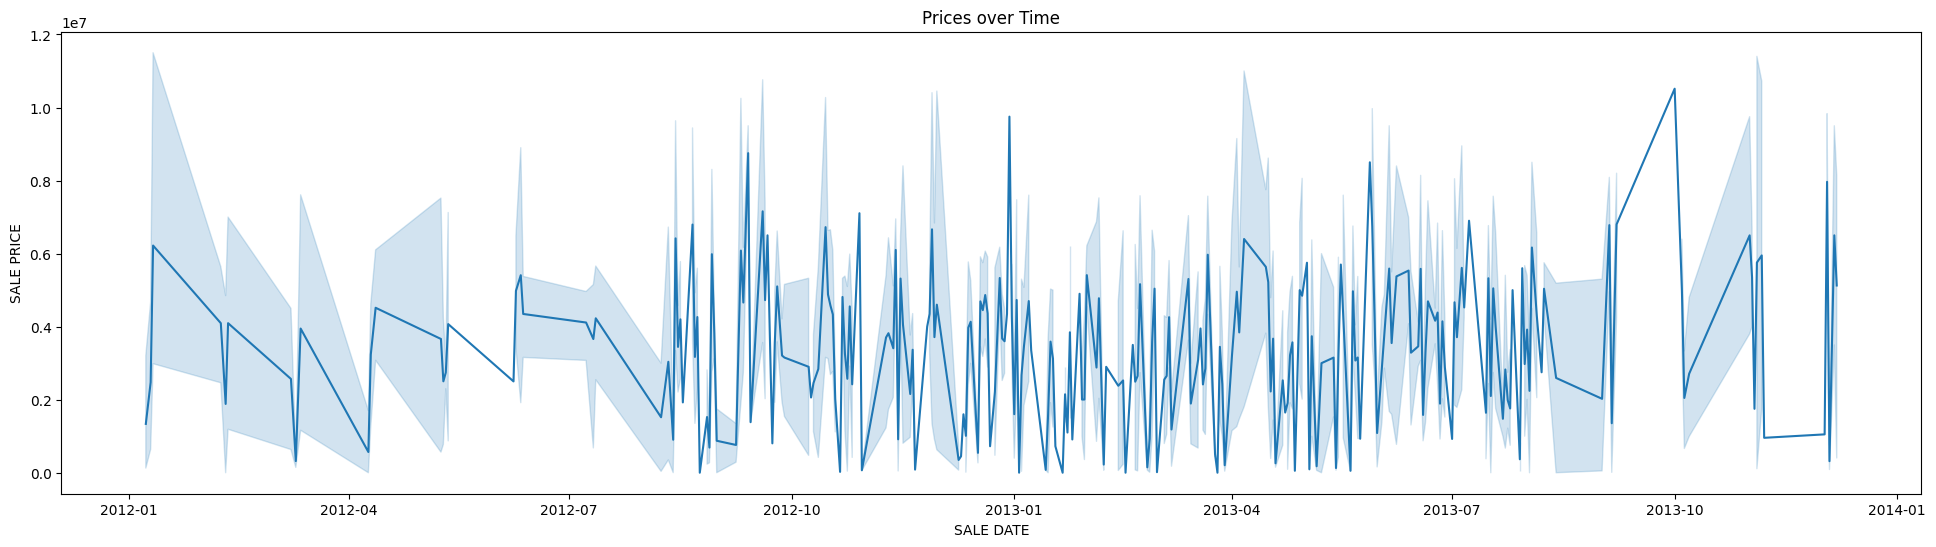

In [496]:
plt.figure(figsize=(24, 6))
sns.lineplot(x='SALE DATE', y='SALE PRICE', data=dataset)
plt.title('Prices over Time')
plt.show()

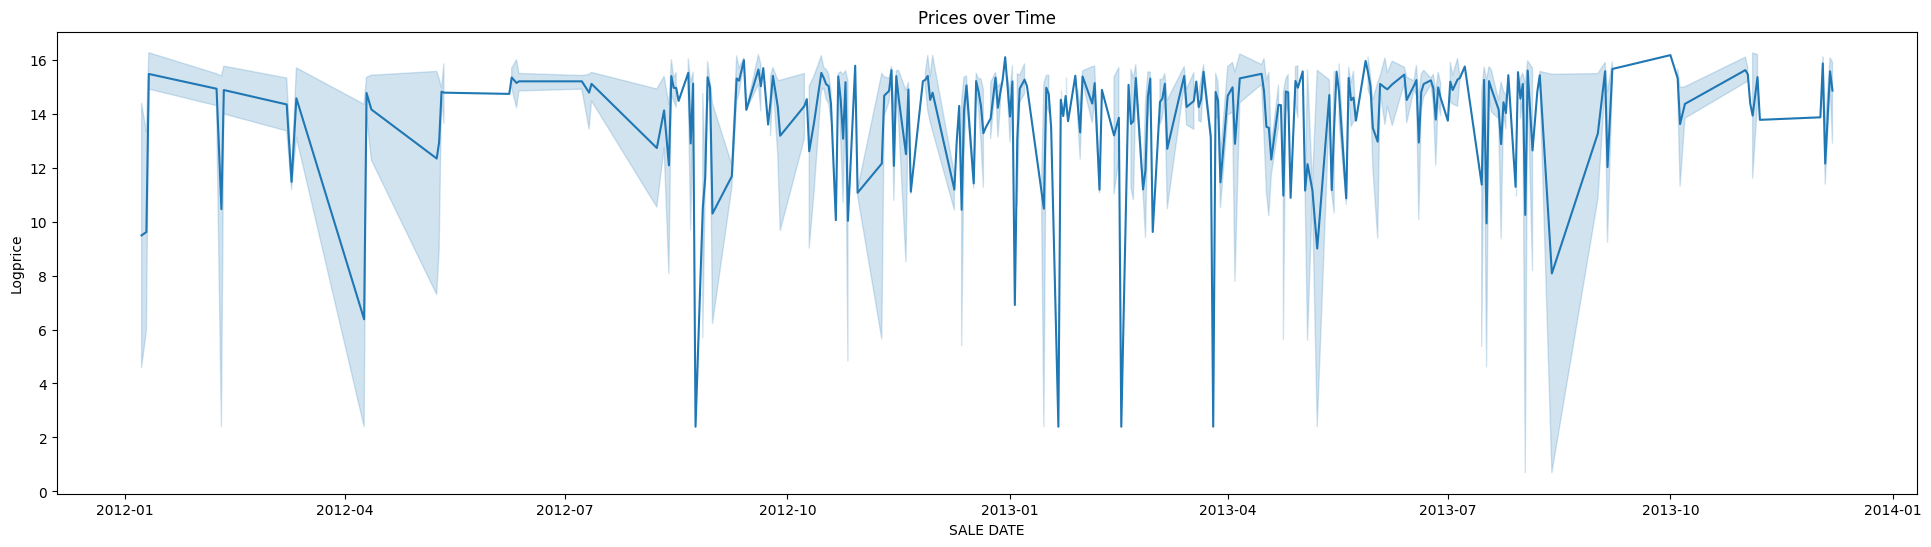

In [497]:
plt.figure(figsize=(24, 6))
sns.lineplot(x='SALE DATE', y='Logprice', data=dataset)
plt.title('Prices over Time')
plt.show()

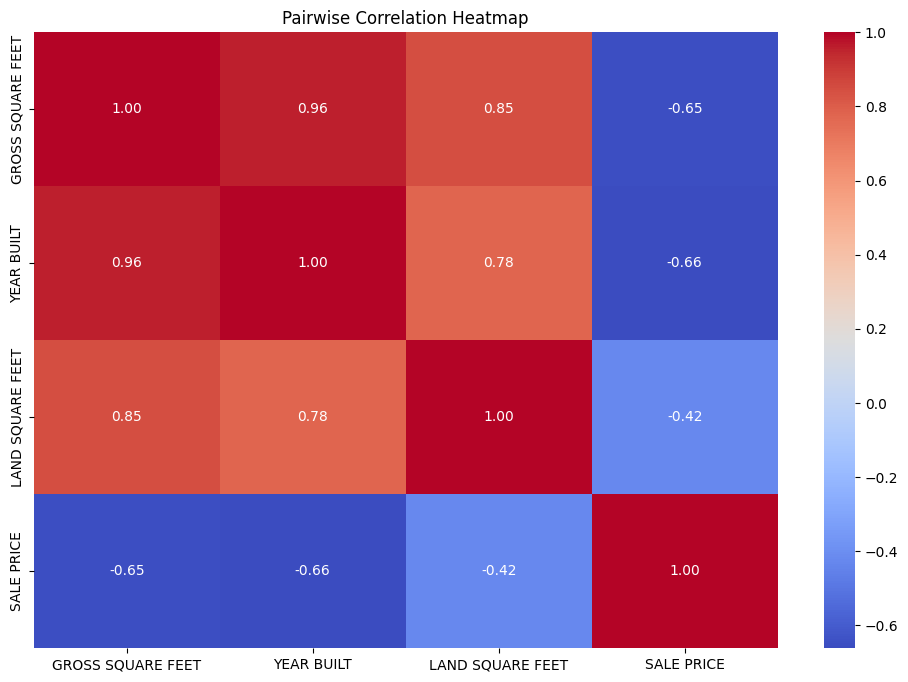

In [498]:
correlation_matrix = dataset[numerical_variables].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()

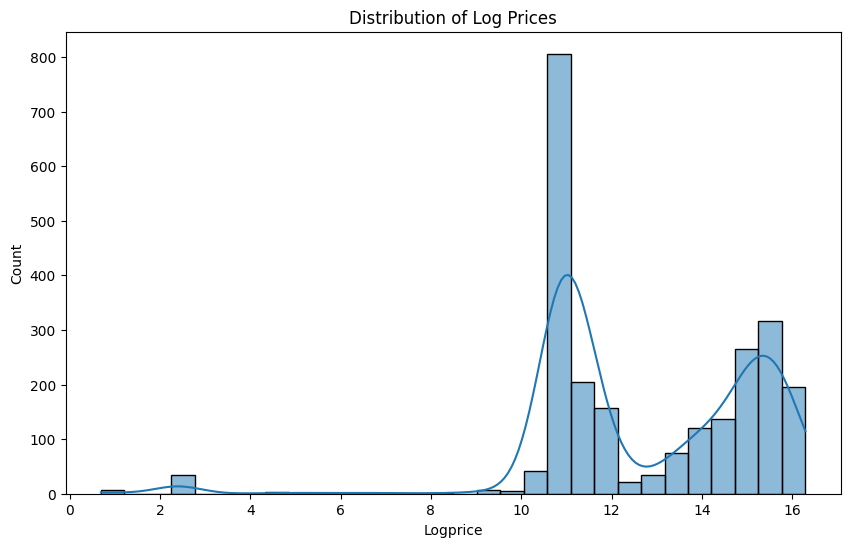

In [499]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Logprice'], bins=30, kde=True)
plt.title('Distribution of Log Prices')
plt.show()

In [500]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [501]:
predictors = ['GROSS SQUARE FEET', 'YEAR BUILT', 'LAND SQUARE FEET', 'SALE PRICE']

In [502]:
X = dataset[predictors]
y = dataset['Logprice']

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [504]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [505]:
y_pred = model.predict(X_test)
variation = y_test - y_pred

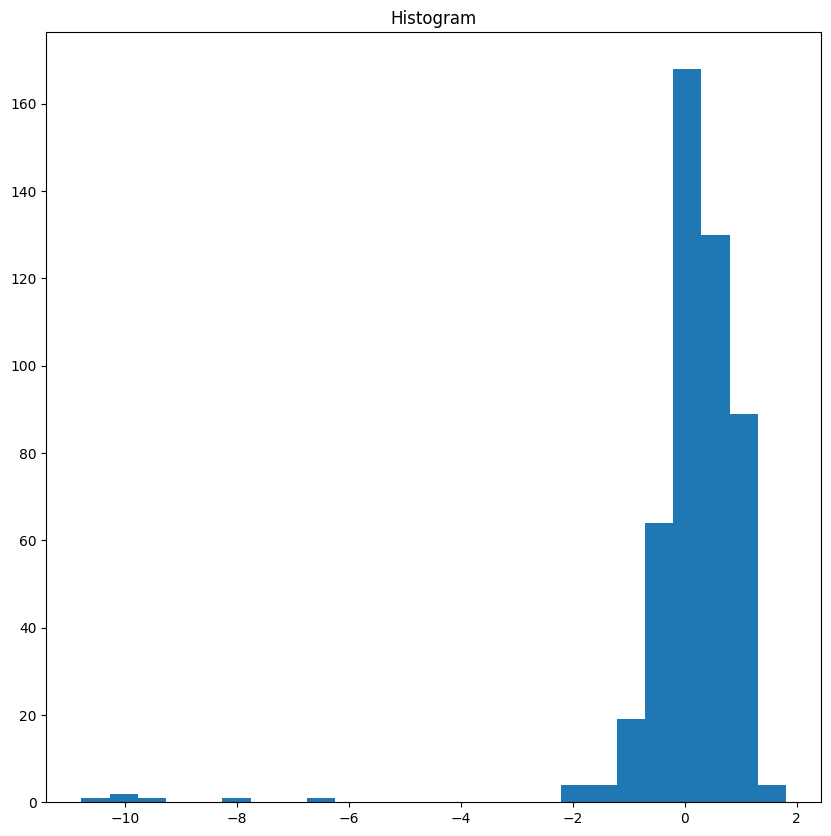

In [506]:
plt.figure(figsize=(10, 10))
plt.hist(variation, bins=25)
plt.title('Histogram')
plt.show()

In [507]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [508]:
crossvalscores = cross_val_score(model, X, y, cv= 5)
print(-crossvalscores)

[-0.37105582 -0.46666633 -0.01872113 -0.02084649 -0.5202121 ]


In [509]:
crossvalscores = cross_val_score(model, X, y, cv= 5, scoring='neg_mean_squared_error')
print(-crossvalscores)

[3.79191203 3.95416821 0.82483079 0.56330788 2.13149772]


In [510]:
#calculating RMSE
crossvalscores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-crossvalscores).mean()
print(rmse)

1.410899521884502


In [512]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [511]:
clusters = ['GROSS SQUARE FEET', 'YEAR BUILT', 'LAND SQUARE FEET', 'SALE PRICE']

In [513]:
X_cluster = dataset[clusters]

In [514]:
scaler = StandardScaler()
X_cluster_standardized = scaler.fit_transform(X_cluster)
kmeans = KMeans(n_clusters=3, random_state=0)
dataset['CLUSTER'] = kmeans.fit_predict(X_cluster_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


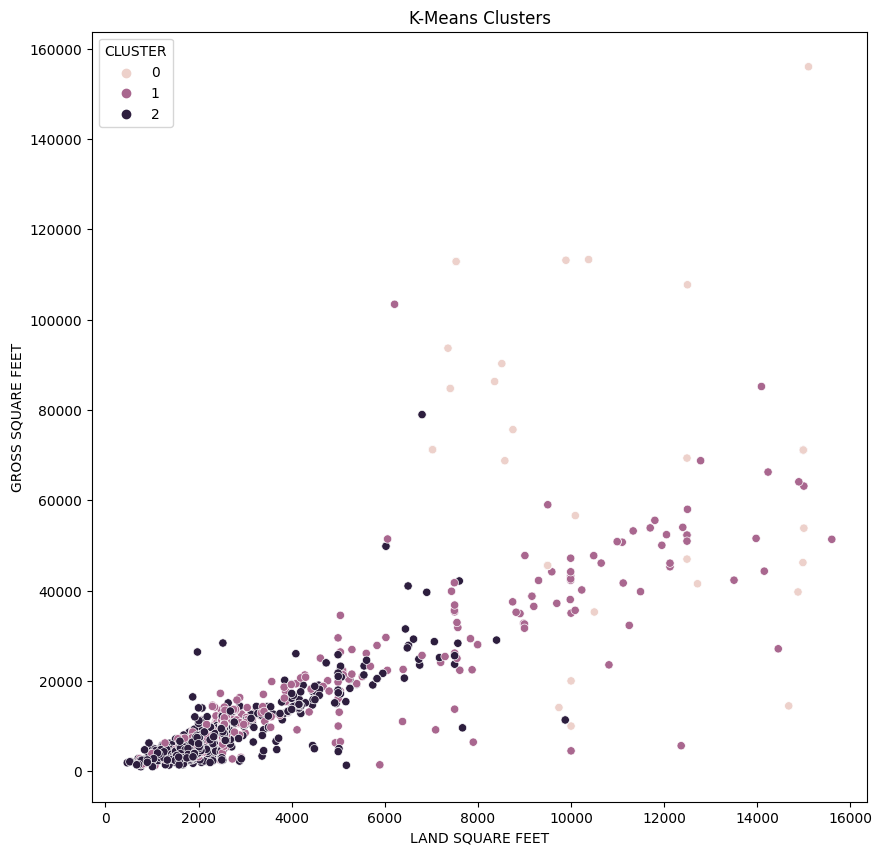

In [515]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='LAND SQUARE FEET', y='GROSS SQUARE FEET', hue='CLUSTER', data=dataset)
plt.title('K-Means Clusters')
plt.show()

In [516]:
models = {}
for cluster_label in range(3):
    cluster_data = dataset[dataset['CLUSTER'] == cluster_label]
    X_cluster = cluster_data[predictors]
    y_cluster = cluster_data['Logprice']

    clustermodels = LinearRegression()
    clustermodels.fit(X_cluster, y_cluster)
    models[cluster_label] = clustermodels

clusters = []
for cluster_label, clustermodels in models.items():
    cluster_data = dataset[dataset['CLUSTER'] == cluster_label]
    X_cluster = cluster_data[predictors]
    y_cluster = cluster_data['Logprice']

    y_pred_cluster = clustermodels.predict(X_cluster)
    rmse_cluster = np.sqrt(mean_squared_error(y_cluster, y_pred_cluster))
    clusters.append(rmse_cluster)

avg_clusters = np.mean(clusters)
print(avg_clusters)

1.0284476763549066


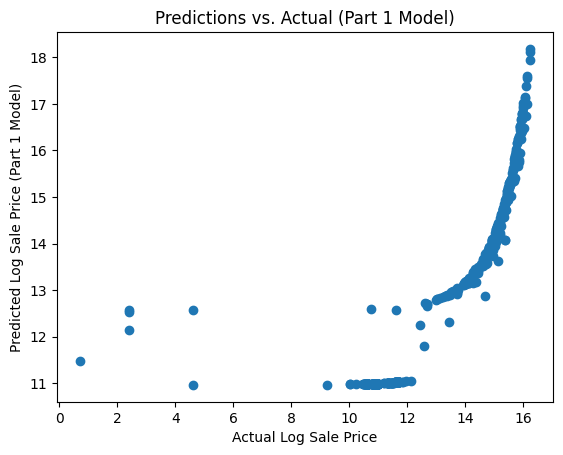

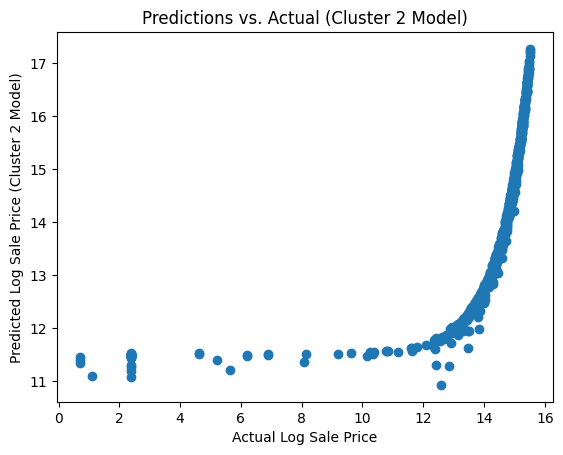

In [517]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Log Sale Price")
plt.ylabel("Predicted Log Sale Price (Part 1 Model)")
plt.title("Predictions vs. Actual (Part 1 Model)")
plt.show()



y_pred2 = clustermodels.predict(X_cluster)
plt.scatter(y_cluster, y_pred2)
plt.xlabel("Actual Log Sale Price")
plt.ylabel(f"Predicted Log Sale Price (Cluster {cluster_label} Model)")
plt.title(f"Predictions vs. Actual (Cluster {cluster_label} Model)")
plt.show()

In [518]:
'''RMSE FOR PART 1 CAME OUT TO BE 1.42 WHILE FOR PART 2 IT IS 1.02.
 HENCE WE CAN SAY THAT THE MODEL IN PART 2 BASED ON THE CLUSTERING METHOD IS A
  BETTER MODEL THAN THE MODEL IN PART 1 WHICH WAS BASED ON LINEAR REGRESSION METHOD.'''

'RMSE FOR PART 1 CAME OUT TO BE 1.42 WHILE FOR PART 2 IT IS 1.02.\n HENCE WE CAN SAY THAT THE MODEL IN PART 2 BASED ON THE CLUSTERING METHOD IS A\n  BETTER MODEL THAN THE MODEL IN PART 1 WHICH WAS BASED ON LINEAR REGRESSION METHOD.'